In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df1 = pd.read_csv('Water Sports.csv')

In [7]:
df1.head()

,Unnamed: 0,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,category
0,29,"Einar Ferdinand ""Einari"" Aalto",M,26.0,180.0,77.0,Finland,FIN,1952,Summer,Helsinki,Swimming,Swimming Men's 400 metres Freestyle,Water Sports
1,32,Minna Maarit Aalto,F,30.0,159.0,55.5,Finland,FIN,1996,Summer,Atlanta,Sailing,Sailing Women's Windsurfer,Water Sports
2,33,Minna Maarit Aalto,F,34.0,159.0,55.5,Finland,FIN,2000,Summer,Sydney,Sailing,Sailing Women's Windsurfer,Water Sports
3,35,Arvo Ossian Aaltonen,M,22.0,180.0,77.0,Finland,FIN,1912,Summer,Stockholm,Swimming,Swimming Men's 200 metres Breaststroke,Water Sports
4,36,Arvo Ossian Aaltonen,M,22.0,180.0,77.0,Finland,FIN,1912,Summer,Stockholm,Swimming,Swimming Men's 400 metres Breaststroke,Water Sports


In [8]:
df1.drop(columns ='Unnamed: 0',axis =1,inplace = True)

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29781 entries, 0 to 29780
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      29781 non-null  object 
 1   Sex       29781 non-null  object 
 2   Age       29781 non-null  float64
 3   Height    29781 non-null  float64
 4   Weight    29781 non-null  float64
 5   Team      29781 non-null  object 
 6   NOC       29781 non-null  object 
 7   Year      29781 non-null  int64  
 8   Season    29781 non-null  object 
 9   City      29781 non-null  object 
 10  Sport     29781 non-null  object 
 11  Event     29781 non-null  object 
 12  category  29781 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 3.0+ MB


In [10]:
df1.corr(numeric_only = True)

,Age,Height,Weight,Year
Age,1.000000,0.157196,0.294361,-0.099238
Height,0.157196,1.000000,0.799900,0.065811
Weight,0.294361,0.799900,1.000000,-0.088657
Year,-0.099238,0.065811,-0.088657,1.000000


<Axes: >

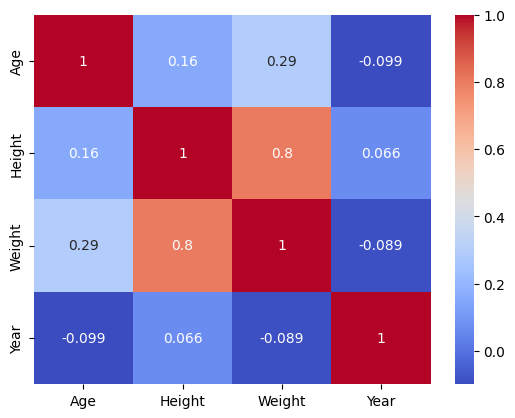

In [11]:
sns.heatmap(df1.corr(numeric_only = True),cmap = 'coolwarm',annot= True)

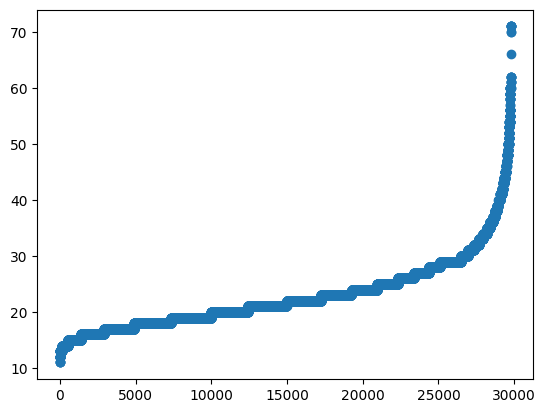

In [12]:
d = df1.sort_values(by = 'Age')
plt.scatter(range(len(d)),'Age',data = d)


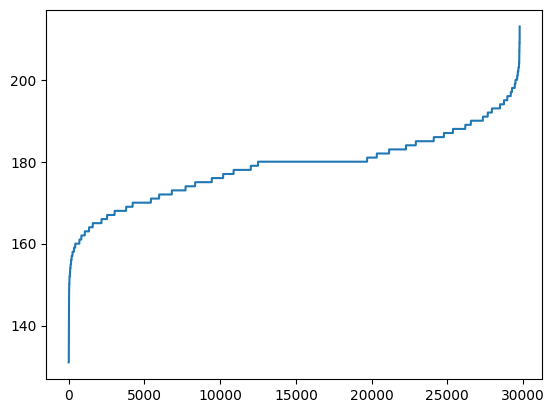

In [13]:
d = df1.sort_values(by = 'Height')
plt.plot(range(len(d)),'Height',data = d)

In [14]:
df1.describe()

,Age,Height,Weight,Year
count,29781.000000,29781.000000,29781.000000,29781.000000
mean,22.852859,178.787415,72.784124,1982.258487
std,6.391984,8.615336,10.733310,27.421946
min,11.000000,131.000000,39.000000,1896.000000
25%,19.000000,173.000000,65.000000,1968.000000
50%,21.000000,180.000000,75.000000,1988.000000
75%,25.000000,184.000000,77.000000,2004.000000
max,71.000000,213.000000,130.000000,2016.000000


# i have check the skewness and correlation,check the oulier in the data.i have see some oulier in the data.so i have remove the oulier in the data

In [15]:
q1 = np.percentile(df1['Age'],25)
q3 = np.percentile(df1['Age'],75)
iqr = q3 - q1
upper_limit_age = q3 + 1.5*iqr
lower_limit_age = q1 - 1.5*iqr
print('upper ',upper_limit_age)
print('lower',lower_limit_age)

upper  34.0
lower 10.0


In [16]:
q1 = np.percentile(df1['Height'],25)
q3 = np.percentile(df1['Height'],75)
iqr = q3 - q1
upper_limit_hg = q3 + 1.5*iqr
lower_limit_hg = q1 - 1.5*iqr
print('upper ',upper_limit_hg)
print('lower',lower_limit_hg)

upper  200.5
lower 156.5


In [17]:
q1 = np.percentile(df1['Weight'],25)
q3 = np.percentile(df1['Weight'],75)
iqr = q3 - q1
upper_limit_wg = q3 + 1.5*iqr
lower_limit_wg = q1 - 1.5*iqr
print('upper ',upper_limit_wg)
print('lower',lower_limit_wg)

upper  95.0
lower 47.0


In [18]:
q1 = np.percentile(df1['Year'],25)
q3 = np.percentile(df1['Year'],75)
iqr = q3 - q1
upper_limit_yr = q3 + 1.5*iqr
lower_limit_yr = q1 - 1.5*iqr
print('upper ',upper_limit_yr)
print('lower',lower_limit_yr)

upper  2058.0
lower 1914.0


In [19]:
# this new data base create.i have remove all outlier in this dataset
df = df1[(df1['Age'] > lower_limit_age) & (df1['Age'] < upper_limit_age) & (df1['Height'] > lower_limit_hg) & (df1['Height'] < upper_limit_hg) & (df1['Year'] > lower_limit_yr) & (df1['Weight'] > lower_limit_wg) & (df1['Weight'] < upper_limit_wg)] 


In [20]:
df.describe()

,Age,Height,Weight,Year
count,25977.000000,25977.000000,25977.000000,25977.000000
mean,21.536282,178.507641,71.708627,1985.638372
std,4.297384,8.217316,9.748705,23.112610
min,11.000000,157.000000,48.000000,1920.000000
25%,18.000000,173.000000,64.000000,1972.000000
50%,21.000000,180.000000,74.000000,1992.000000
75%,24.000000,183.000000,77.000000,2004.000000
max,33.000000,200.000000,94.000000,2016.000000


C:\Users\lenovo\AppData\Local\Temp\ipykernel_7260\3983742443.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'], hist=False, label='Age', ax=axes[0, 0],color = 'red')
C:\Users\lenovo\AppData\Local\Temp\ipykernel_7260\3983742443.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  

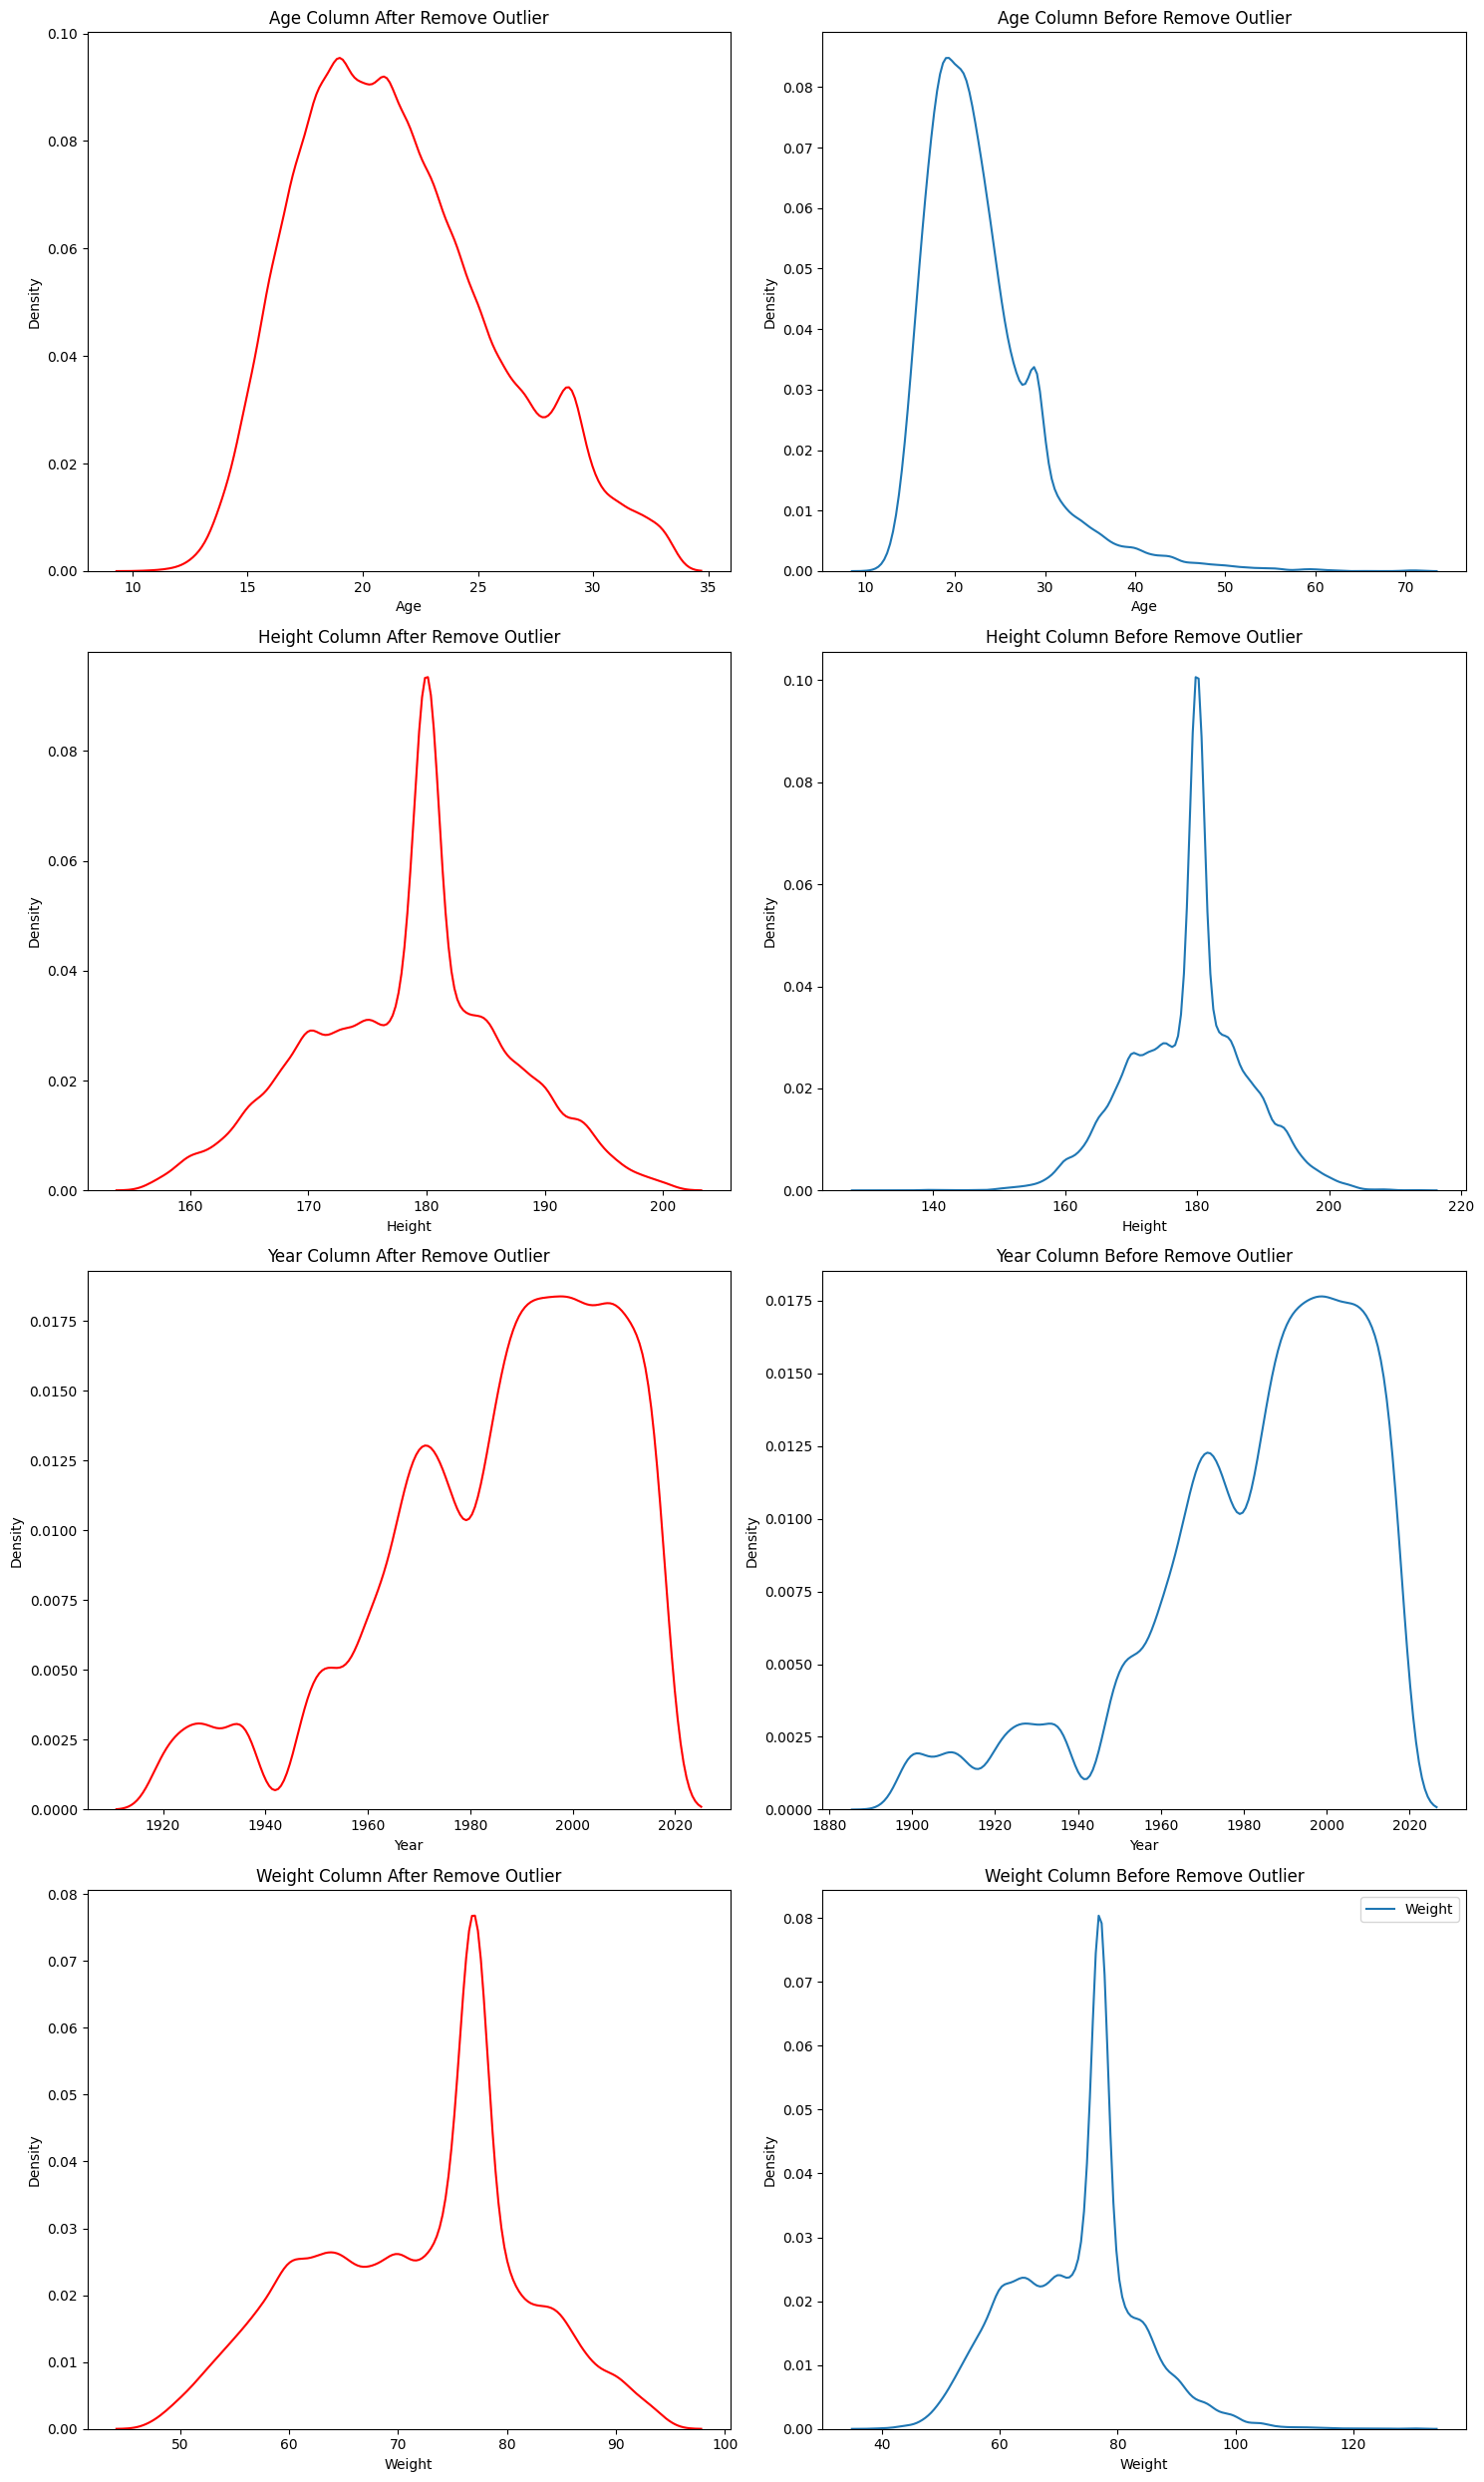

In [21]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 25))
#age plot
sns.distplot(df['Age'], hist=False, label='Age', ax=axes[0, 0],color = 'red')
axes[0, 0].set_title('Age Column After Remove Outlier')

sns.distplot(df1['Age'], hist=False, label='Age', ax=axes[0, 1])
axes[0, 1].set_title('Age Column Before Remove Outlier')



# Plot Height
sns.distplot(df['Height'], hist=False, label='Height', ax=axes[1, 0],color = 'red')
axes[1, 0].set_title('Height Column After Remove Outlier')

sns.distplot(df1['Height'], hist=False, label='Height', ax=axes[1, 1])
axes[1, 1].set_title('Height Column Before Remove Outlier')


#plot Year
sns.distplot(df['Year'], hist=False, label='Year', ax=axes[2, 0],color = 'red')
axes[2, 0].set_title('Year Column After Remove Outlier')

sns.distplot(df1['Year'], hist=False, label='year', ax=axes[2, 1])
axes[2, 1].set_title('Year Column Before Remove Outlier')



# Plot Weight
sns.distplot(df['Weight'], hist=False, label='weight',color = 'red', ax=axes[3, 0])
axes[3, 0].set_title('Weight Column After Remove Outlier')

sns.distplot(df1['Weight'], hist=False, label='Weight', ax=axes[3, 1])
axes[3, 1].set_title('Weight Column Before Remove Outlier')


# Adjust layout
plt.tight_layout()
plt.legend()

# Show the plot
plt.show()


In [22]:
y1 = df['Year'].skew()
h1 = df['Height'].skew()
w1 = df['Weight'].skew()
a1 = df['Age'].skew()
y = df1['Year'].skew()
h = df1['Height'].skew()
w = df1['Weight'].skew()
a = df1['Age'].skew()
print(f'After remove outlier Year skewness:{y1} and Before remove outlier skewness:{y}')
print(f'After remove outlier Height skewness:{h1} and Before remove outlier skewness:{h}')
print(f'After remove outlier Weight skewness:{w1} and Before remove outlier skewness:{w}')
print(f'After remove outlier Age skewness:{a1} and Before remove outlier skewness:{a}')



After remove outlier Year skewness:-0.8488362148946058 and Before remove outlier skewness:-1.0804909286166846
After remove outlier Height skewness:-0.1096020006815035 and Before remove outlier skewness:-0.14447851898756656
After remove outlier Weight skewness:-0.2122509363393504 and Before remove outlier skewness:0.12172065483909127
After remove outlier Age skewness:0.5229875652791451 and Before remove outlier skewness:1.763841163943458


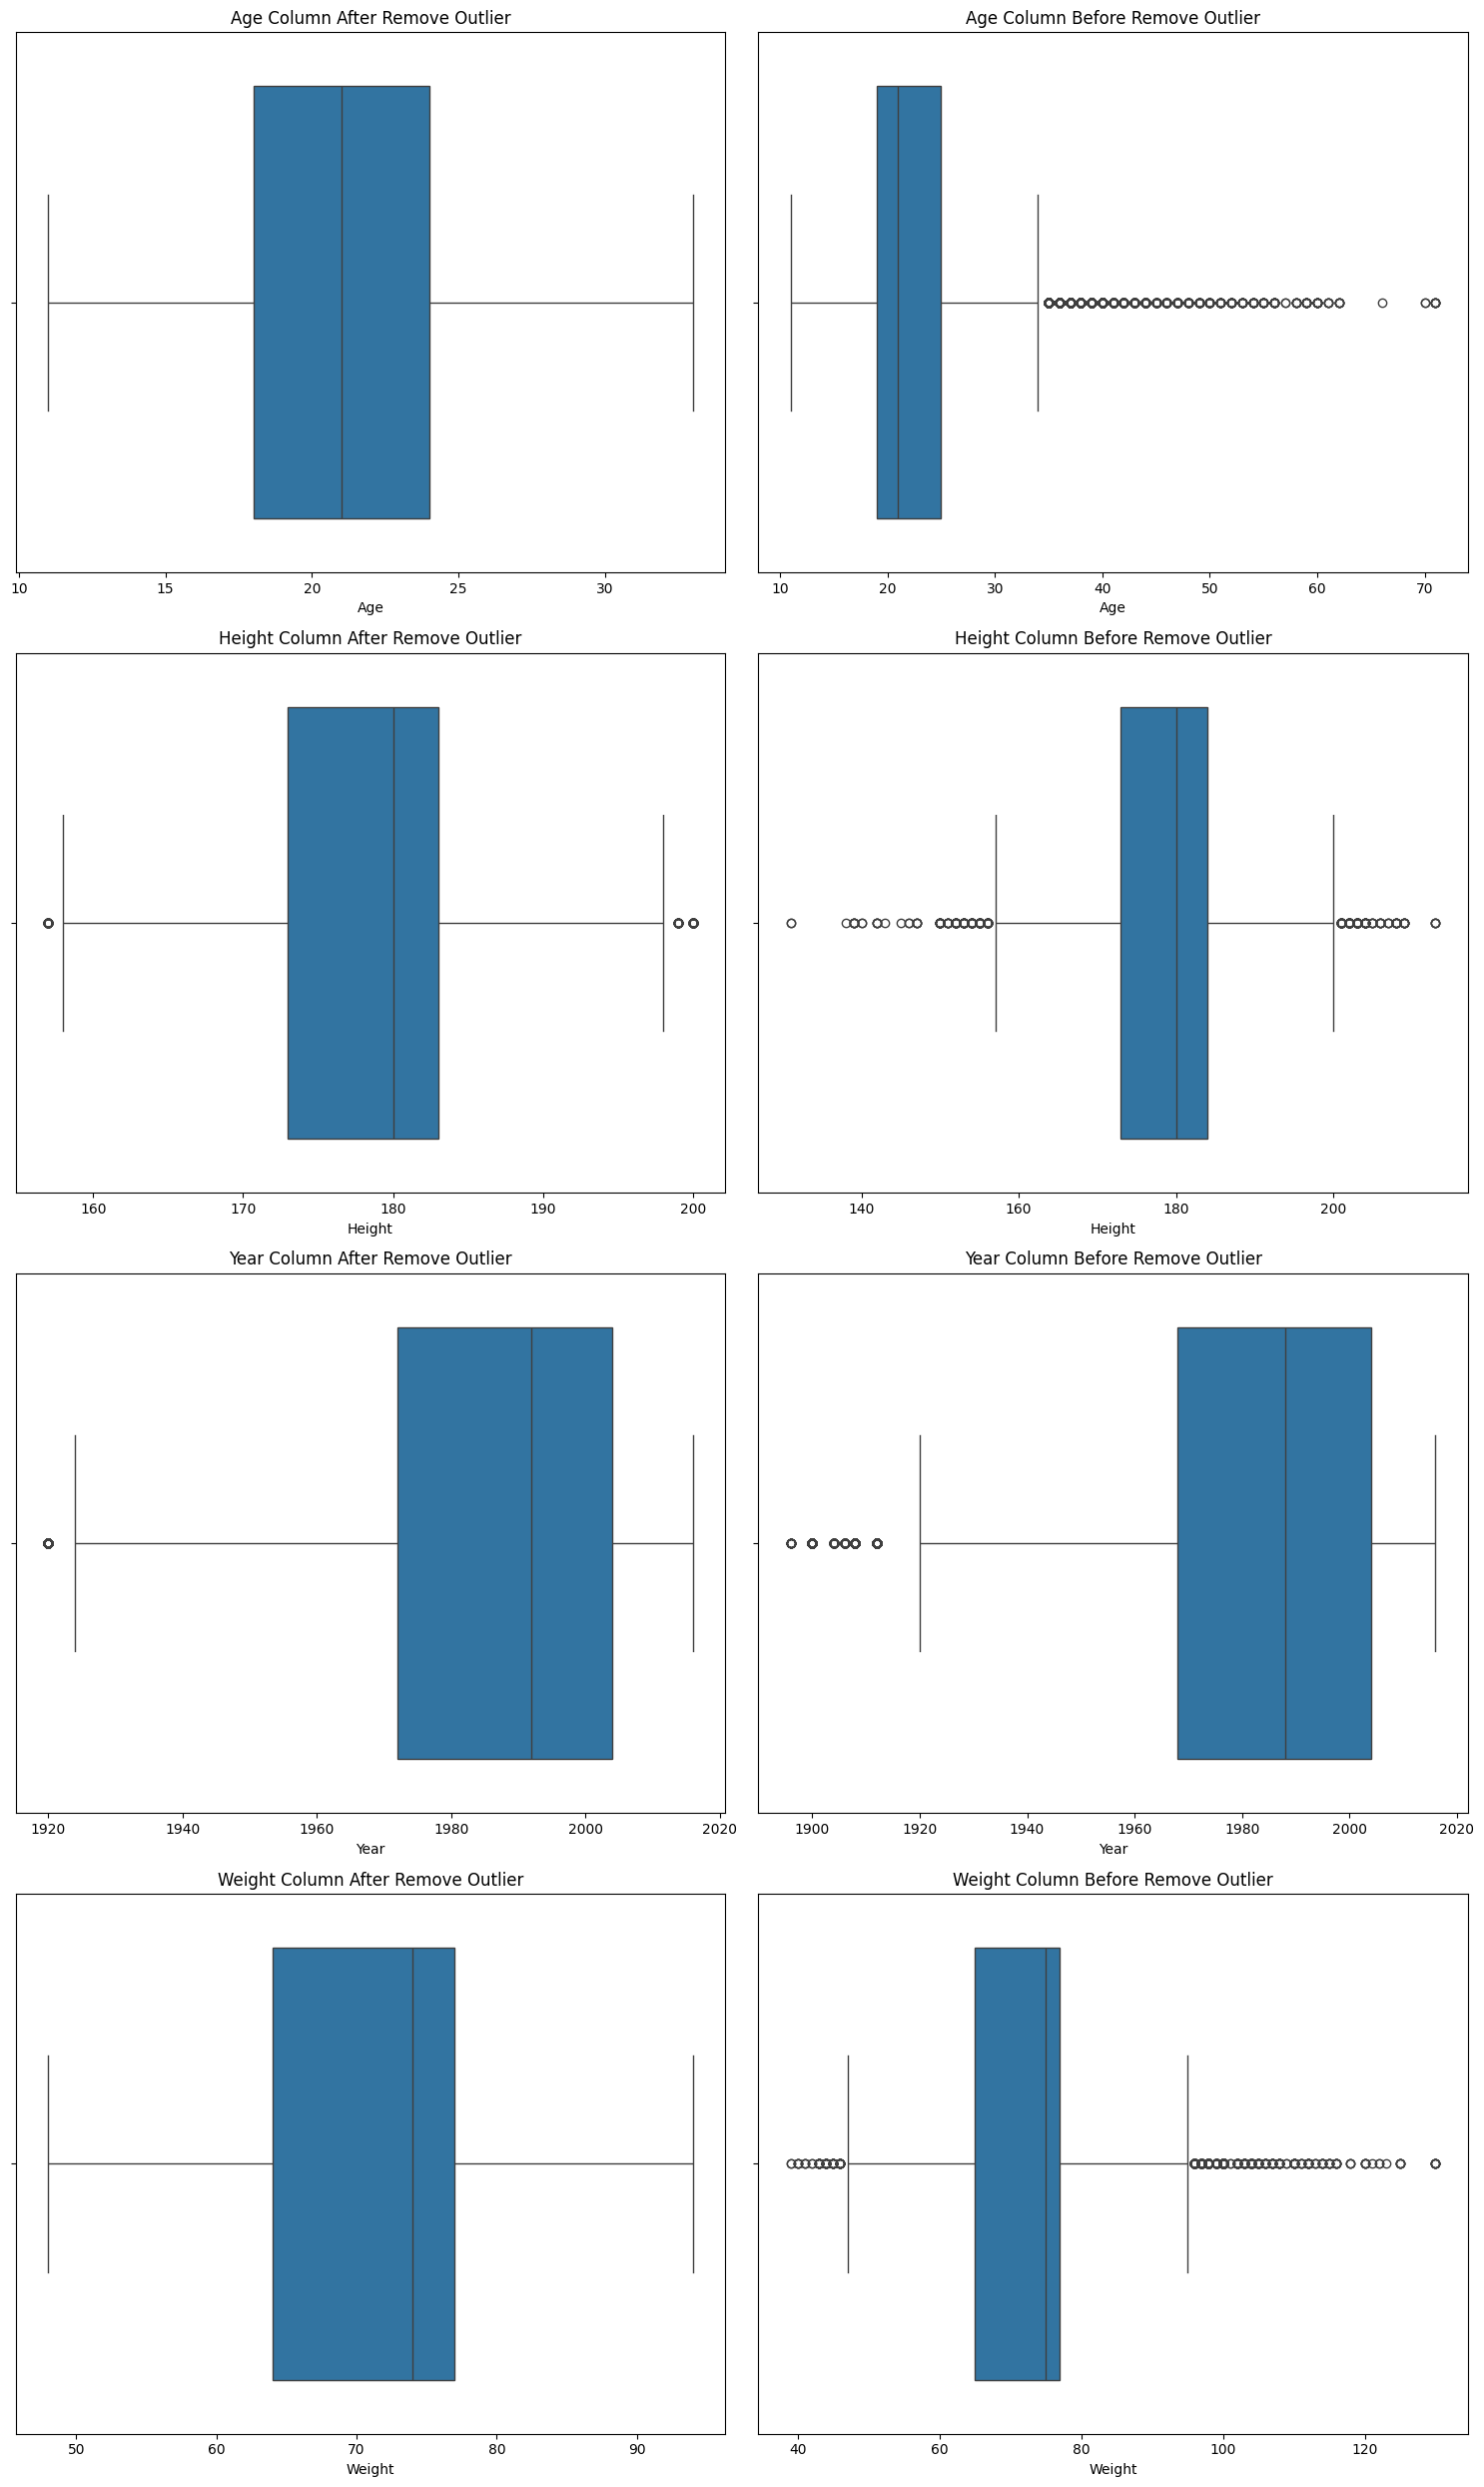

In [23]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 25))
#age plot
sns.boxplot(x = df['Age'], ax=axes[0, 0])
axes[0, 0].set_title('Age Column After Remove Outlier')

sns.boxplot(x = df1['Age'],ax=axes[0, 1])
axes[0, 1].set_title('Age Column Before Remove Outlier')



# Plot Height
sns.boxplot(x = df['Height'], ax=axes[1, 0])
axes[1, 0].set_title('Height Column After Remove Outlier')

sns.boxplot(x = df1['Height'],ax=axes[1, 1])
axes[1, 1].set_title('Height Column Before Remove Outlier')


#plot Year
sns.boxplot(x = df['Year'] ,ax=axes[2, 0])
axes[2, 0].set_title('Year Column After Remove Outlier')

sns.boxplot(x = df1['Year'], ax=axes[2, 1])
axes[2, 1].set_title('Year Column Before Remove Outlier')



# Plot Weight
sns.boxplot(x = df['Weight'], ax=axes[3, 0])
axes[3, 0].set_title('Weight Column After Remove Outlier')

sns.boxplot(x = df1['Weight'], ax=axes[3, 1])
axes[3, 1].set_title('Weight Column Before Remove Outlier')


# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


C:\Users\lenovo\AppData\Local\Temp\ipykernel_7260\1638793607.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = df['Sex'],palette = list('rgb'))
C:\Users\lenovo\AppData\Local\Temp\ipykernel_7260\1638793607.py:1: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  ax = sns.countplot(x = df['Sex'],palette = list('rgb'))


Text(0.5, 1.0, 'Sex Ratio According to Dataset')

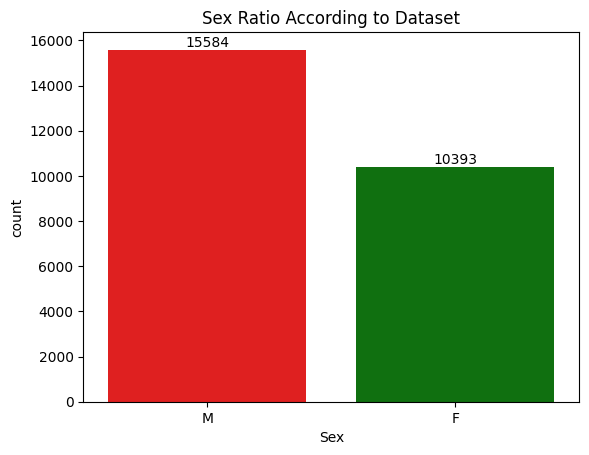

In [24]:
ax = sns.countplot(x = df['Sex'],palette = list('rgb'))
for i in range(df.Sex.nunique()):
    ax.bar_label(ax.containers[i]) 
plt.title('Sex Ratio According to Dataset')

In [25]:
def age_c(data):
    if 10<= data <=20:
        return '10-20'
    elif 21<= data <=30:
        return '21-30'
    elif 31<= data <=40:
        return '31 - 40'
df['Age_Group'] = df['Age'].apply(age_c)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_7260\450057113.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age_Group'] = df['Age'].apply(age_c)


In [26]:
df.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,category,Age_Group
0,"Einar Ferdinand ""Einari"" Aalto",M,26.0,180.0,77.0,Finland,FIN,1952,Summer,Helsinki,Swimming,Swimming Men's 400 metres Freestyle,Water Sports,21-30
1,Minna Maarit Aalto,F,30.0,159.0,55.5,Finland,FIN,1996,Summer,Atlanta,Sailing,Sailing Women's Windsurfer,Water Sports,21-30
5,Arvo Ossian Aaltonen,M,30.0,180.0,77.0,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Water Sports,21-30
6,Arvo Ossian Aaltonen,M,30.0,180.0,77.0,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Water Sports,21-30
10,Mika Lauri Aarnikka,M,24.0,187.0,76.0,Finland,FIN,1992,Summer,Barcelona,Sailing,Sailing Men's Two Person Dinghy,Water Sports,21-30


C:\Users\lenovo\AppData\Local\Temp\ipykernel_7260\2836699870.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels = ['10-20','21-30','31-40'])


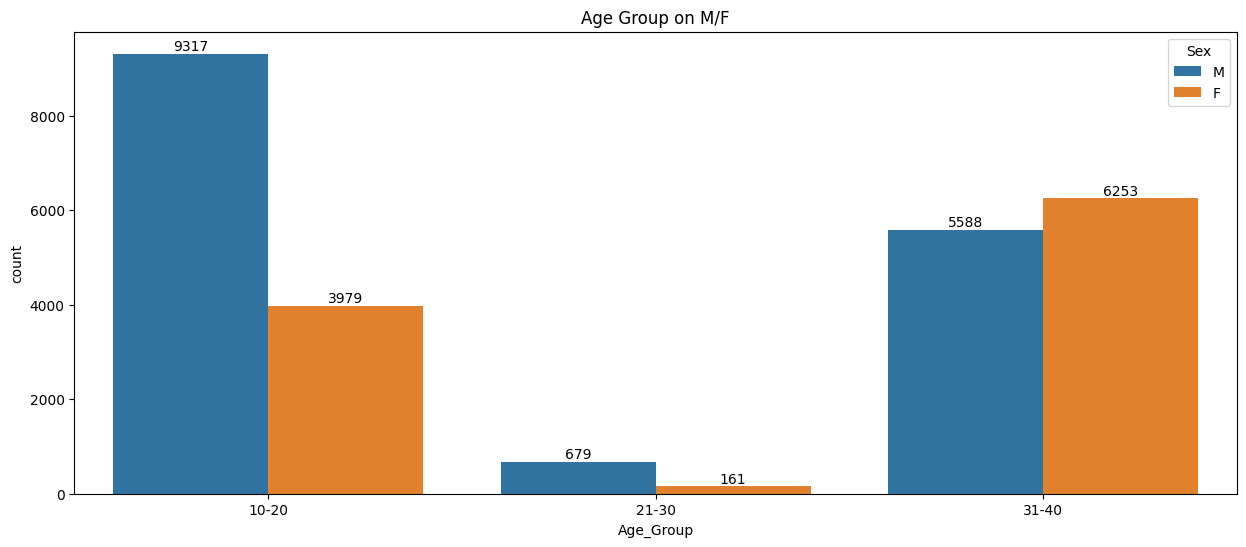

In [27]:
plt.figure(figsize = (15,6))
ax = sns.countplot(x = df['Age_Group'],hue = df['Sex'])
for i in range(df.Sex.nunique()):
    ax.bar_label(ax.containers[i]) 
ax.set_xticklabels(labels = ['10-20','21-30','31-40'])
plt.title('Age Group on M/F')
plt.show()

In [28]:
l = df['Sport'].unique()

l

array(['Swimming', 'Sailing'], dtype=object)

In [29]:
age_mean = round(df.groupby(['Sport','Sex'])['Age'].mean()).reset_index()
age_mean

,Sport,Sex,Age
0,Sailing,F,25.0
1,Sailing,M,26.0
2,Swimming,F,20.0
3,Swimming,M,21.0


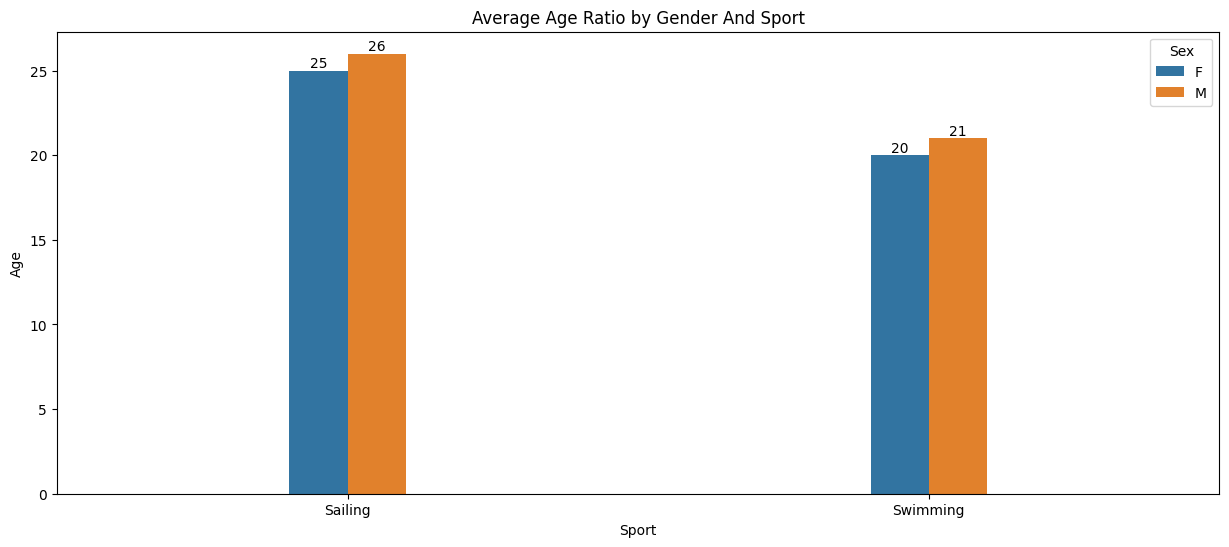

In [30]:
plt.figure(figsize = (15,6))
ax = sns.barplot(x=age_mean['Sport'],y = age_mean['Age'],hue = age_mean['Sex'],width = 0.2)
for i in range(df.Sex.nunique()):
    ax.bar_label(ax.containers[i]) 
ax.set_title('Average Age Ratio by Gender And Sport')
plt.show()

In [31]:
wg_mean = round(df.groupby(['Sport','Sex'])['Weight'].mean()).reset_index()
wg_mean
hg_mean = round(df.groupby(['Sport','Sex'])['Height'].mean()).reset_index()
wg_mean

,Sport,Sex,Weight
0,Sailing,F,64.0
1,Sailing,M,76.0
2,Swimming,F,64.0
3,Swimming,M,77.0


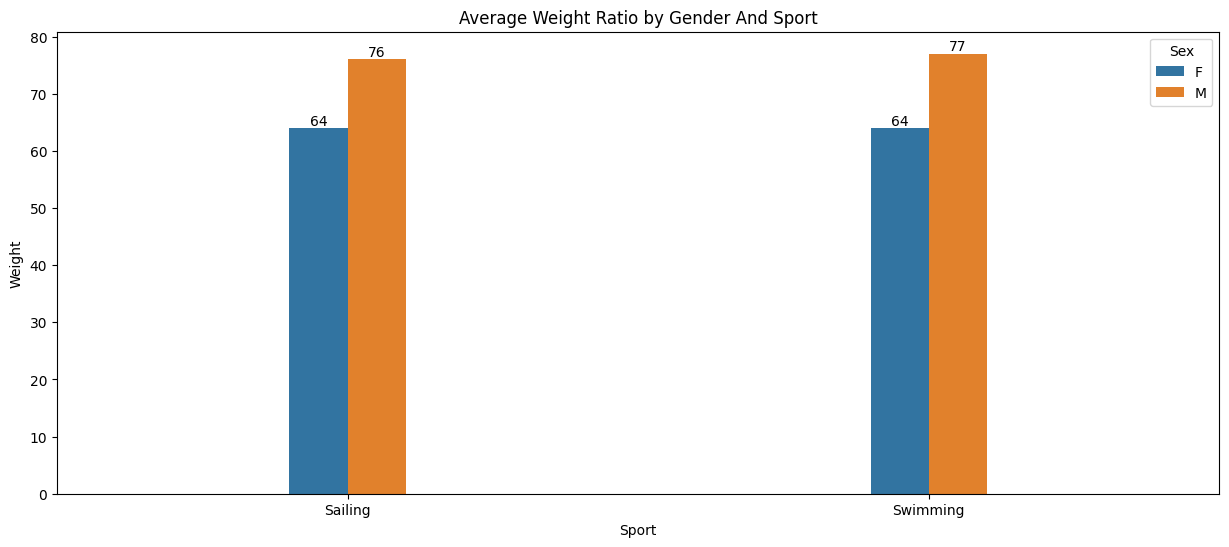

In [32]:
plt.figure(figsize = (15,6))

ax = sns.barplot(x=wg_mean['Sport'],y = wg_mean['Weight'],hue = wg_mean['Sex'],width = 0.2)
for i in range(df.Sex.nunique()):
    ax.bar_label(ax.containers[i]) 
ax.set_title('Average Weight Ratio by Gender And Sport')
plt.show()

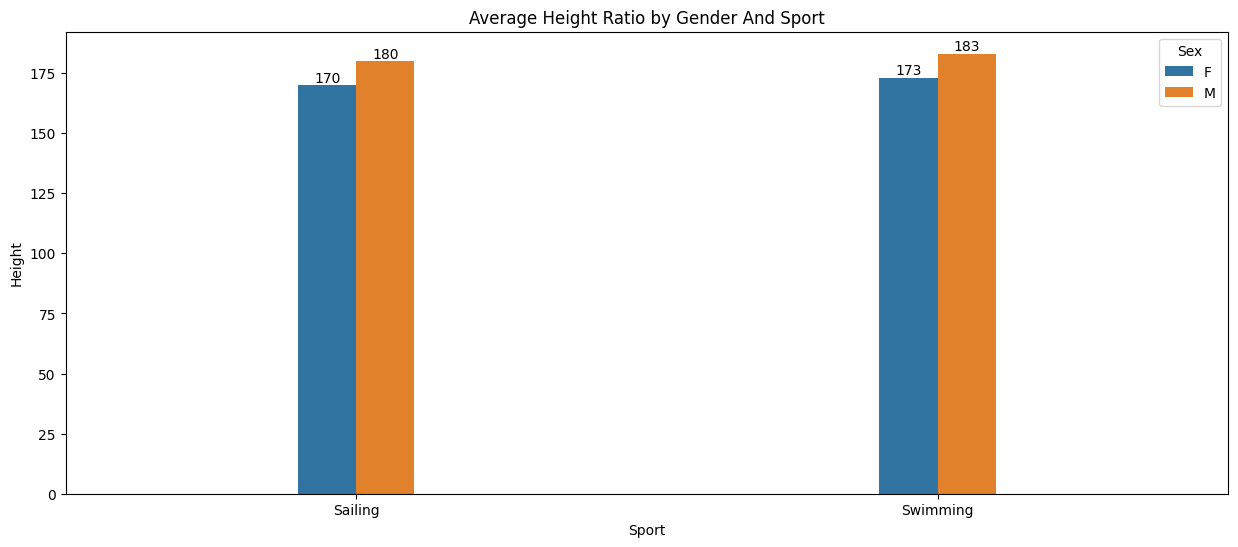

In [33]:
plt.figure(figsize = (15,6))

ax = sns.barplot(x=hg_mean['Sport'],y = hg_mean['Height'],hue = hg_mean['Sex'],width = 0.2)
for i in range(df.Sex.nunique()):
    ax.bar_label(ax.containers[i]) 
ax.set_title('Average Height Ratio by Gender And Sport')
plt.show()

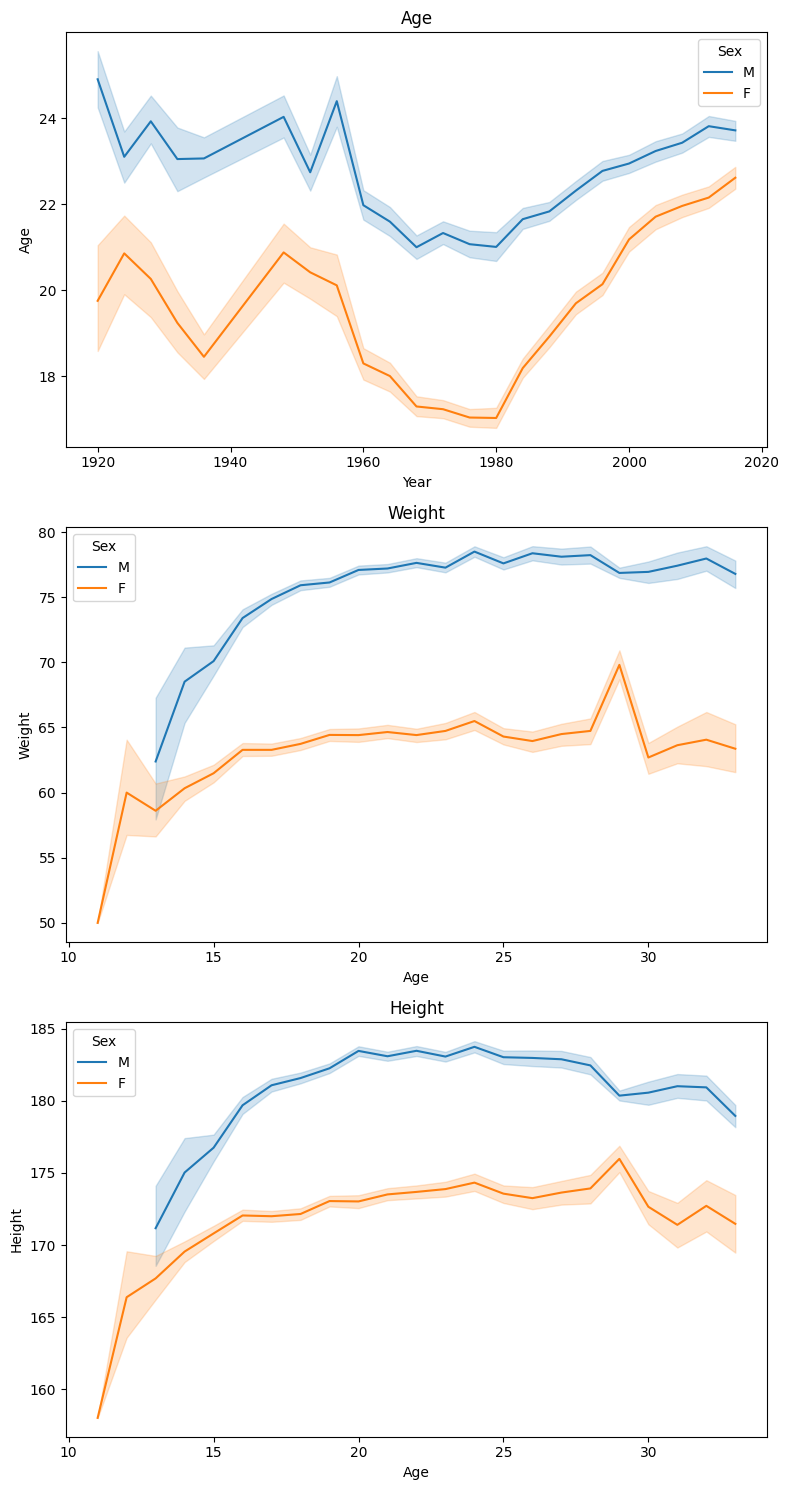

In [34]:
plt.figure(figsize = (8,15))
plt.subplot(3,1,1)
ax = sns.lineplot(x = df['Year'],y = df['Age'],hue = df['Sex'])
ax.set_title('Age')
plt.subplot(3,1,2)
ax = sns.lineplot(y = df['Weight'],x = df['Age'],hue = df['Sex'])
ax.set_title('Weight')
plt.subplot(3,1,3)
ax = sns.lineplot(y = df['Height'],x = df['Age'],hue = df['Sex'])
ax.set_title('Height')
plt.tight_layout()
plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_7260\6287823.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x  = 'Team',y = team_p['Name'], data = team_p,palette = list('rgb'))
C:\Users\lenovo\AppData\Local\Temp\ipykernel_7260\6287823.py:3: UserWarning: 
The palette list has fewer values (3) than needed (15) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x  = 'Team',y = team_p['Name'], data = team_p,palette = list('rgb'))


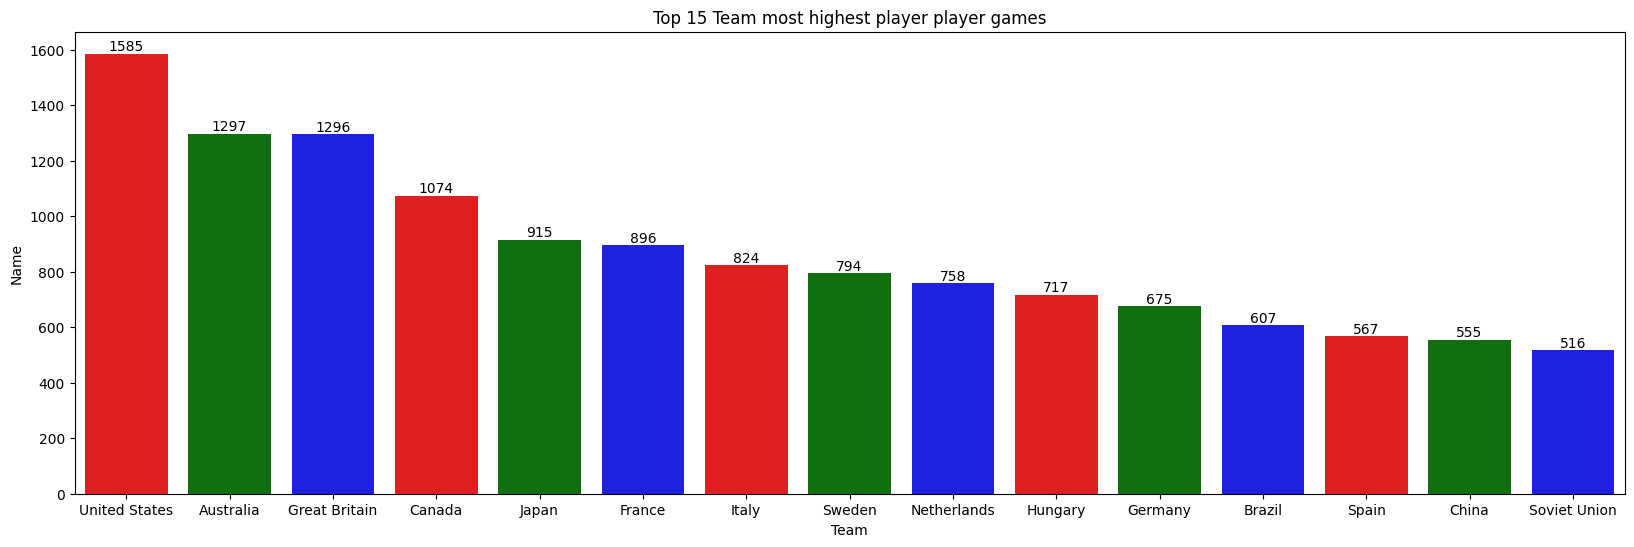

In [37]:
plt.figure(figsize = (20,6))
team_p =   df.groupby(['Team'])['Name'].count().reset_index().sort_values(by = 'Name',ascending = False).head(15)
ax = sns.barplot(x  = 'Team',y = team_p['Name'], data = team_p,palette = list('rgb'))
for i in range(team_p.Name.nunique()):
    ax.bar_label(ax.containers[i])
plt.title('Top 15 Team most highest player player games')
plt.show()

<Axes: xlabel='Year', ylabel='Name'>

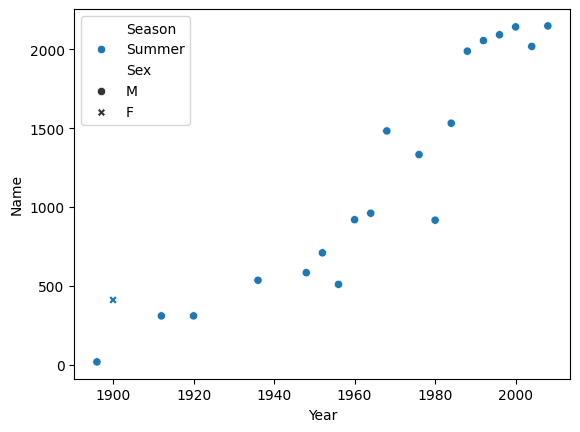

In [36]:
d = df1.groupby(['Year','Season'])['Name'].count().reset_index()
sns.scatterplot(x =d['Year'],y = d['Name'],hue = d['Season'],style = df['Sex'])

In [86]:
team_p = df.groupby(['City','Sport'])['Name'].count().reset_index().sort_values(by = 'Name',ascending = False)
plt.figure(figsize = (10,6))
ax = sns.barplot(x  = team_p['Sport'],y = team_p['Name'],palette = list('rgb'),width = 0.2)
for i in range(team_p.Name.nunique()):
    ax.bar_label(ax.containers[i])
plt.title('Top 15 Team most highest player player games')
plt.show()

,City,Sport,Name
17,London,Swimming,1861
11,Beijing,Swimming,1657
39,Sydney,Swimming,1653
9,Barcelona,Swimming,1585
7,Atlanta,Swimming,1573
37,Seoul,Swimming,1570
5,Athina,Swimming,1536
33,Rio de Janeiro,Swimming,1506
19,Los Angeles,Swimming,1402
29,Munich,Swimming,1235


,City,Sport,Name
17,London,Swimming,1861
11,Beijing,Swimming,1657
39,Sydney,Swimming,1653
9,Barcelona,Swimming,1585
7,Atlanta,Swimming,1573
37,Seoul,Swimming,1570
5,Athina,Swimming,1536
33,Rio de Janeiro,Swimming,1506
19,Los Angeles,Swimming,1402
29,Munich,Swimming,1235
